# Curso de Python feito pela FEA.Dev à USP
Uma breve análise dos alunos a partir das informações fornecidas por eles no formulário de interesse. 


<p align='center'>
    <img src ='https://www.techrepublic.com/wp-content/uploads/2022/12/tra-python-3-courses-121422-770x385.png'>
</p>

In [2]:
# Importação das bibliotecas necessárias

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode

## **Parte feita pelo Gustavo Yuji — Tratamento dos dados**

In [3]:
# Formulário de interesse

df = pd.read_csv(r'C:\Users\ana_c\OneDrive\Documentos\GitHub\Random\Manifestação_de_Interesse_Curso_de_Python_2022.csv', decimal = ',')

pd.set_option('display.max_columns', None)
df = pd.read_csv(r'C:\Users\ana_c\OneDrive\Documentos\GitHub\Random\Manifestação_de_Interesse_Curso_de_Python_2022.csv', decimal = ',')

In [4]:
# Utilizar apenas colunas interessantes

df = df.iloc[:, [1,2,3,4,10,11,12,13,14,15,16,17,21,37,38,39]]
df.columns = ['Idade', 'Genero', 'Ano de ingresso','Aluno USP', 'Nível de graduação', 'Instituto', 'Curso', 'Período', 'Vida profissional', 'Conhecimento prog', 'Conhecimento Py', 'Outras linguagens', 'Formato preferido', 'Nome', 'Nusp', 'e-mail'] 

In [5]:
# Remover duplicadas

df.drop_duplicates(subset = ['e-mail'], keep = 'last', inplace = True) 

In [6]:
# Transformar os institutos em valores únicos

df['Instituto'] = df['Instituto'].apply(lambda x: str(x).upper().strip().replace('USP', "").replace('/', '').replace('-',''))

for antigo, novo in {"FCF ( FACULDADE DE CIÊNCIAS FARMACÊUTICAS )":'FCF', 'INSTITUTO DE BIOCIÊNCIAS (IB)': 'IB'}.items():
    df['Instituto'] = df['Instituto'].replace(antigo, novo)

In [7]:
# Padronizar os anos de ingresso

for antigo, novo in {'21':'2021', '16':'2016', '17':'2017', '021':'2021', '2013/2022':'2013', '20':'2020'}.items():
    df['Ano de ingresso'] = df['Ano de ingresso'].replace(antigo, novo)

In [8]:
# Casos que podem indicar que a pessoa não sabe outra linguagem
# Substituindo esses casos por 'não'

teste = df.dropna(subset = ['Outras linguagens'])
teste = teste[(teste['Outras linguagens'].str.startswith('n')) | 
      (teste['Outras linguagens'].str.contains('Ainda', case = False)) |
      (teste['Outras linguagens'].str.startswith('N'))]['Outras linguagens'].unique().tolist()

df['Outras linguagens'].fillna("Não", inplace = True)

df['Outras linguagens'] = np.where(df['Outras linguagens'].isin(teste), "Não", "Sim")

In [9]:
# Remoção das sujeiras da coluna idade

df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
df['Idade'] = df['Idade'].fillna(df['Idade'].mode()[0])
df['Idade'].replace({2014:df['Idade'].mode()[0], 900:df['Idade'].mode()[0],
                            1:df['Idade'].mode()[0]}, inplace=True)

In [10]:
# Padronização da coluna de graduação

df['Nível de graduação'].replace({'pos-doutorado':'Pós-Doutorado', 'Doutorado ':'Doutorado', 
                                        'Sou funcionária do Setor de Arquivo do Instituto de Biociências da USP.':'Funcionário',
                                        'Funcionário/aluna pós':'Funcionário', 'Doutorado direto ':'Doutorado'}, inplace=True)

In [11]:
# Ano para inteiro

df['Ano de ingresso'] = df['Ano de ingresso'].astype(int)

## **Parte feita pela Ana C. Santos — Visualização dos dados**

In [12]:
# Colunas do df para escolher as mais interessantes

df.columns

Index(['Idade', 'Genero', 'Ano de ingresso', 'Aluno USP', 'Nível de graduação',
       'Instituto', 'Curso', 'Período', 'Vida profissional',
       'Conhecimento prog', 'Conhecimento Py', 'Outras linguagens',
       'Formato preferido', 'Nome', 'Nusp', 'e-mail'],
      dtype='object')

## 1-) Perfil Pessoal

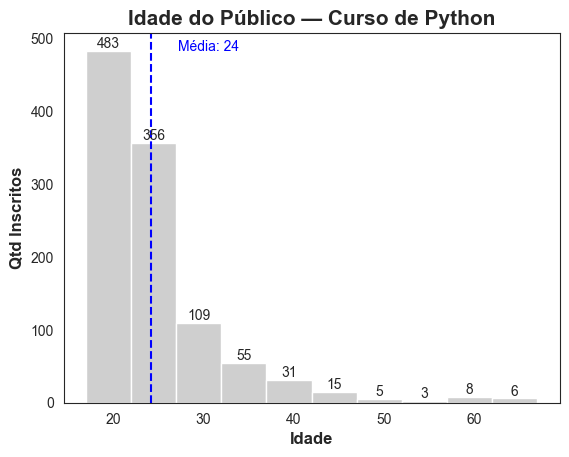

In [116]:
# Utilizei +- o código do gustavo para mudar apenas o estilo
# Visualizar idade dos alunos

ax = sns.histplot(df, x='Idade', stat='count', binwidth = 5, color = '0.75')
ax.set_title('Idade do Público — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel('Idade', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')

for container in ax.containers:
    ax.bar_label(container)

plt.axvline(x = df.Idade.mean(), color = 'blue', label = 'Média', ls = '--')

plt.text(x = df['Idade'].mean()+3,
         y = max([h.get_height() for h in ax.patches]),
         s = 'Média: {:.0f}'.format(df['Idade'].mean()), 
 color = 'blue')

plt.show()

In [117]:
# Gênero dos incritos

df_genero = pd.DataFrame(df.groupby(['Genero']).size())
df_genero.reset_index(inplace = True)
df_genero.columns = ['Gênero', 'Qtd Inscritos']
drop_no_answer = df_genero[(df_genero['Gênero'] == 'Prefiro não dizer')].index
df_genero.drop(drop_no_answer, inplace = True)
df_genero.sort_values('Qtd Inscritos', ascending = False)

,Gênero,Qtd Inscritos
1,Masculino,638
0,Feminino,415
2,Não Binário,13


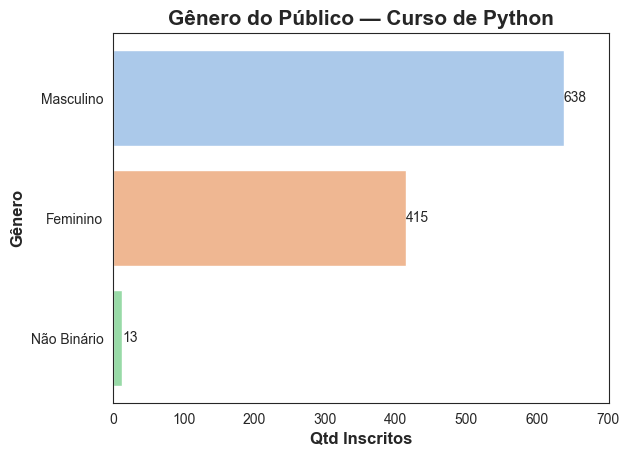

In [118]:
# Visualizar gênero público

sns.set_style('white')

genero = sns.barplot(x = df_genero['Qtd Inscritos'], 
                         y = df_genero['Gênero'], 
                         data = df_genero, 
                         palette = 'pastel',
                         order = df_genero.sort_values('Qtd Inscritos', ascending = False).Gênero)

genero.set_title('Gênero do Público — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
genero.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
genero.set_ylabel('Gênero', fontsize = 12, fontweight = 'bold')
genero.bar_label(genero.containers[0])
genero.margins(x = 0.1, y = 0.05)

## 2-) Perfil Profissional

In [137]:
# Vida profissional dos inscritos

df_profissional = pd.DataFrame(df.groupby(['Vida profissional']).size())
df_profissional.reset_index(inplace = True)
df_profissional.columns = ['Status', 'Qtd Inscritos']
df_profissional['Status'] = df_profissional['Status'].map({'Estou em busca de um estágio': 'Buscando estágio',
                                                           'Já estou estagiando/trabalhando': 'Estagiando/Trabalhando',
                                                           'Não pretendo estagiar tão cedo': 'Apenas estudando'})

df_profissional

,Status,Qtd Inscritos
0,Buscando estágio,354
1,Estagiando/Trabalhando,528
2,Apenas estudando,166


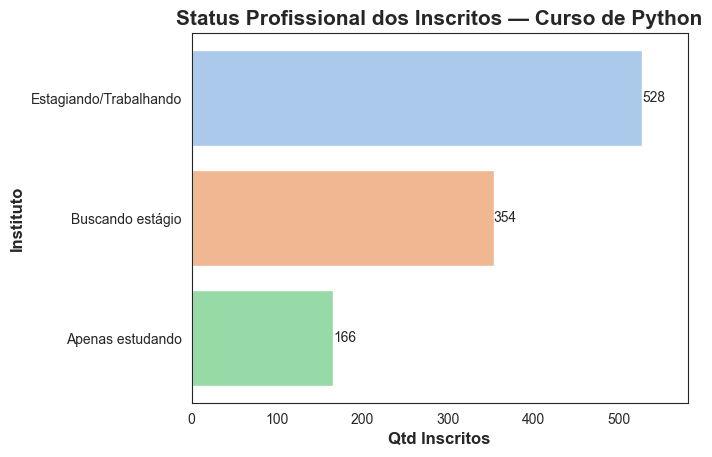

In [138]:
# Visualizar vida profissional

sns.set_style('white')

status = sns.barplot(x = df_profissional['Qtd Inscritos'], 
                         y = df_profissional['Status'], 
                         data = df_profissional, 
                         palette = 'pastel',
                         order = df_profissional.sort_values('Qtd Inscritos', ascending = False).Status)

status.set_title('Status Profissional dos Inscritos — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
status.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
status.set_ylabel('Instituto', fontsize = 12, fontweight = 'bold')
status.bar_label(status.containers[0])
status.margins(x = 0.1, y = 0.05)

## 3-) Perfil Acadêmico

In [80]:
# Criar um df com a quantidade de inscritos em cada instituto
# Visualizar os institutos não feanos com pelo menos cinco inscritos interessados

df_instituto = pd.DataFrame(df.groupby(['Instituto']).size())
df_instituto.reset_index(inplace = True)
df_instituto.columns = ['Instituto', 'Qtd Inscritos']
drop_fea = df_instituto[(df_instituto['Instituto'] == 'FEA')].index
drop_nan = df_instituto[(df_instituto['Instituto'] == 'NAN')].index
drop_qtd = df_instituto[(df_instituto['Qtd Inscritos'] < 5)].index
df_instituto.drop(drop_fea, inplace = True)
df_instituto.drop(drop_nan, inplace = True)
df_instituto.drop(drop_qtd, inplace = True)
df_instituto.sort_values('Qtd Inscritos', ascending = False)

,Instituto,Qtd Inscritos
3,ECA,115
32,IME,110
17,FFLCH,100
25,IB,83
11,FCF,50
38,POLI,28
2,EACH,10
34,IQ,8
26,ICB,7
39,SANFRAN,7


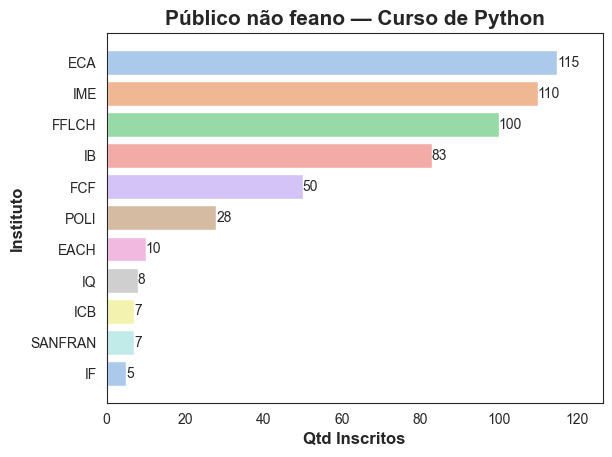

In [81]:
# Visualizar público não feano

sns.set_style('white')

institutos = sns.barplot(x = df_instituto['Qtd Inscritos'], 
                         y = df_instituto['Instituto'], 
                         data = df_instituto, 
                         palette = 'pastel',
                         order = df_instituto.sort_values('Qtd Inscritos', ascending = False).Instituto)

institutos.set_title('Público não feano — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
institutos.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
institutos.set_ylabel('Instituto', fontsize = 12, fontweight = 'bold')
institutos.bar_label(institutos.containers[0])
institutos.margins(x = 0.1, y = 0.05)

In [98]:
# Não Graduandos

df_escolaridade = pd.DataFrame(df.groupby(['Nível de graduação']).size())
df_escolaridade.reset_index(inplace = True)
df_escolaridade.columns = ['Escolaridade', 'Qtd Inscritos']
drop_grad = df_escolaridade[(df_escolaridade['Escolaridade'] == 'Graduação')].index
drop_nan = df_escolaridade[(df_escolaridade['Escolaridade'] == 'NAN')].index
df_escolaridade.drop(drop_grad, inplace = True)
df_escolaridade.drop(drop_nan, inplace = True)
df_escolaridade.sort_values('Qtd Inscritos', ascending = False)

,Escolaridade,Qtd Inscritos
5,Pós-Graduação,30
3,Mestrado,25
0,Doutorado,17
1,Funcionário,2
4,Pós-Doutorado,1


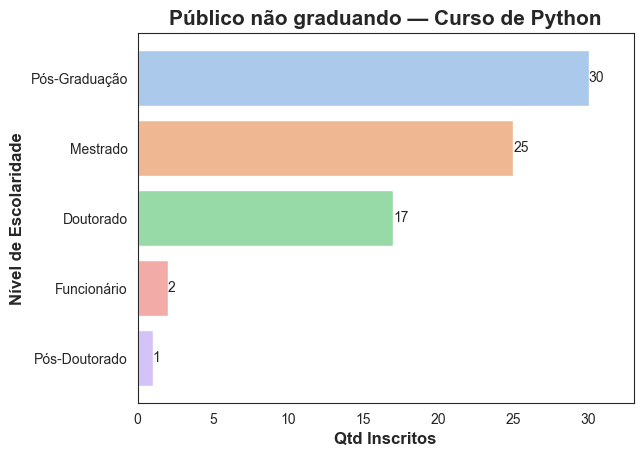

In [101]:
# Visualizar público não graduando

sns.set_style('white')

escolaridade = sns.barplot(x = df_escolaridade['Qtd Inscritos'], 
                         y = df_escolaridade['Escolaridade'], 
                         data = df_escolaridade, 
                         palette = 'pastel',
                         order = df_escolaridade.sort_values('Qtd Inscritos', ascending = False).Escolaridade)

escolaridade.set_title('Público não graduando — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
escolaridade.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
escolaridade.set_ylabel('Nível de Escolaridade', fontsize = 12, fontweight = 'bold')
escolaridade.bar_label(escolaridade.containers[0])
escolaridade.margins(x = 0.1, y = 0.05)

In [143]:
# Cursos não feanos

df_curso = pd.DataFrame(df.groupby(['Curso']).size())
df_curso.reset_index(inplace = True)
df_curso.columns = ['Curso', 'Qtd Inscritos']
df_curso['Curso'] = df_curso['Curso'].str.capitalize()
drop_adm = df_curso[(df_curso['Curso'] == 'Administração')].index
drop_econo = df_curso[(df_curso['Curso'] == 'Economia')].index
drop_cont = df_curso[(df_curso['Curso'] == 'Contabilidade')].index
drop_atu = df_curso[(df_curso['Curso'] == 'Ciências atuariais')].index
drop_qtd = df_curso[(df_curso['Qtd Inscritos'] < 7)].index
df_curso.drop(drop_adm, inplace = True)
df_curso.drop(drop_econo, inplace = True)
df_curso.drop(drop_cont, inplace = True)
df_curso.drop(drop_atu, inplace = True)
df_curso.drop(drop_qtd, inplace = True)
df_curso.sort_values('Qtd Inscritos', ascending = False)

,Curso,Qtd Inscritos
73,Matemática,92
11,Ciências biológicas,84
65,História,69
48,Farmácia,51
5,Biblioteconomia,42
86,Relações públicas,18
69,Letras,14
78,Música,11
25,Educomunicação,10
83,Publicidade e propaganda,9


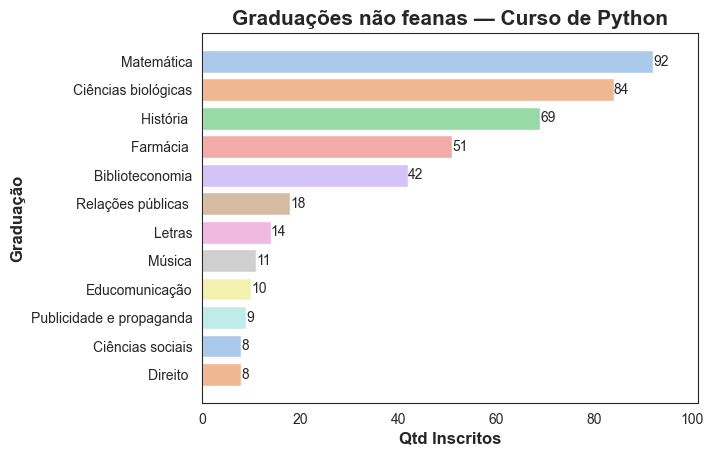

In [144]:
# Visualizar cursos não feanos

sns.set_style('white')

curso = sns.barplot(x = df_curso['Qtd Inscritos'], 
                         y = df_curso['Curso'], 
                         data = df_curso, 
                         palette = 'pastel',
                         order = df_curso.sort_values('Qtd Inscritos', ascending = False).Curso)

curso.set_title('Graduações não feanas — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
curso.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
curso.set_ylabel('Graduação', fontsize = 12, fontweight = 'bold')
curso.bar_label(curso.containers[0])
curso.margins(x = 0.1, y = 0.05)

## 4-) Perfil Programador

In [161]:
# Conhecimento em lógica de programação

df_logica = pd.DataFrame(df.groupby(['Conhecimento prog']).size())
df_logica.reset_index(inplace = True)
df_logica.columns = ['Conhecimento', 'Qtd Inscritos']
df_logica['Conhecimento'] = df_logica['Conhecimento'].map({1: 'Nada',
                                                           2: 'Pouco',
                                                           3: 'Médio',
                                                           4: 'Fluência Parcial',
                                                           5: 'Fluência Total'})

df_logica.sort_values('Qtd Inscritos', ascending = False)
df_logica

,Conhecimento,Qtd Inscritos
0,Nada,381
1,Pouco,312
2,Médio,234
3,Fluência Parcial,112
4,Fluência Total,32


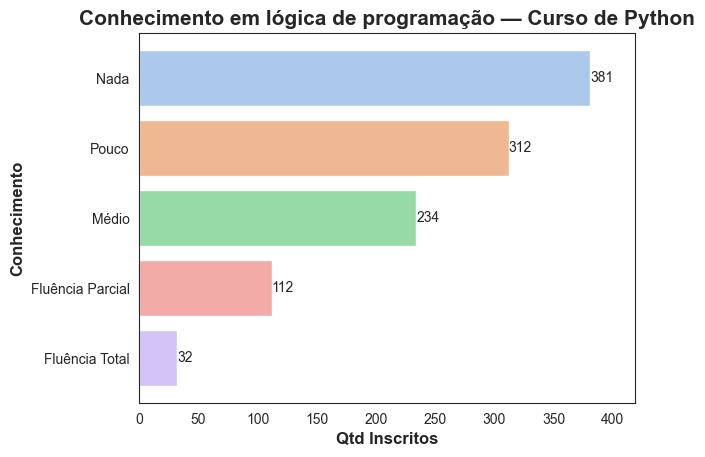

In [162]:
# Visualização do conhecimento em lógica de programação

sns.set_style('white')

curso = sns.barplot(x = df_logica['Qtd Inscritos'], 
                         y = df_logica['Conhecimento'], 
                         data = df_logica, 
                         palette = 'pastel',
                         order = df_logica.sort_values('Qtd Inscritos', ascending = False).Conhecimento)

curso.set_title('Conhecimento em lógica de programação — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
curso.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
curso.set_ylabel('Conhecimento', fontsize = 12, fontweight = 'bold')
curso.bar_label(curso.containers[0])
curso.margins(x = 0.1, y = 0.05)

In [163]:
# Conhecimento em python

df_python = pd.DataFrame(df.groupby(['Conhecimento Py']).size())
df_python.reset_index(inplace = True)
df_python.columns = ['Conhecimento', 'Qtd Inscritos']
df_python['Conhecimento'] = df_python['Conhecimento'].map({1: 'Nada',
                                                           2: 'Pouco',
                                                           3: 'Médio',
                                                           4: 'Fluência Parcial',
                                                           5: 'Fluência Total'})

df_python.sort_values('Qtd Inscritos', ascending = False)
df_python

,Conhecimento,Qtd Inscritos
0,Nada,634
1,Pouco,277
2,Médio,128
3,Fluência Parcial,30
4,Fluência Total,2


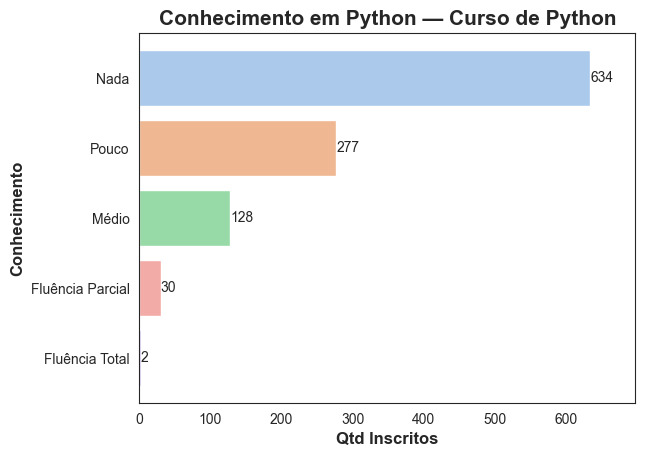

In [164]:
# Visualização do conhecimento em python

sns.set_style('white')

curso = sns.barplot(x = df_python['Qtd Inscritos'], 
                         y = df_python['Conhecimento'], 
                         data = df_python, 
                         palette = 'pastel',
                         order = df_python.sort_values('Qtd Inscritos', ascending = False).Conhecimento)

curso.set_title('Conhecimento em Python — Curso de Python', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
curso.set_xlabel('Qtd Inscritos', fontsize = 12, fontweight = 'bold')
curso.set_ylabel('Conhecimento', fontsize = 12, fontweight = 'bold')
curso.bar_label(curso.containers[0])
curso.margins(x = 0.1, y = 0.05)